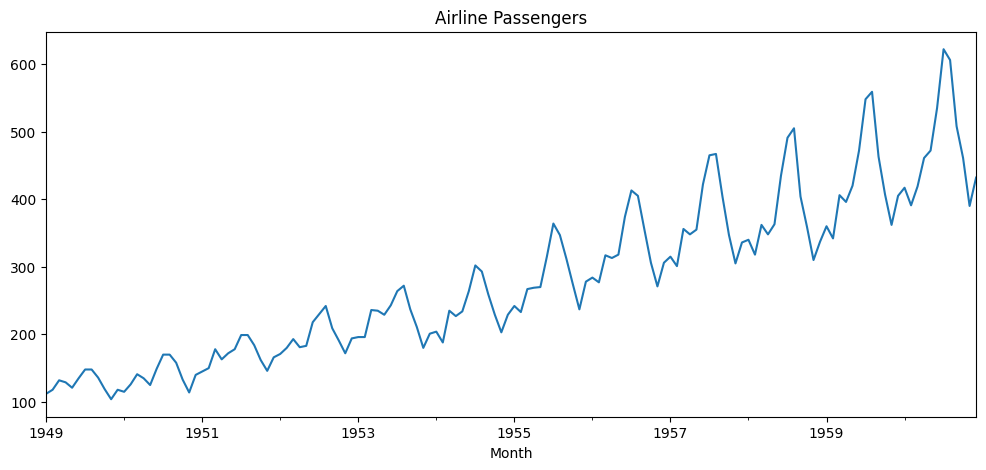

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv(
    'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv',
    index_col='Month',
    parse_dates=True
)

# Plot the data
df['Passengers'].plot(figsize=(12, 5), title='Airline Passengers')
plt.show()

In [2]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test
result = adfuller(df['Passengers'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}') # p-value > 0.05 means non-stationary

ADF Statistic: 0.8153688792060482
p-value: 0.991880243437641


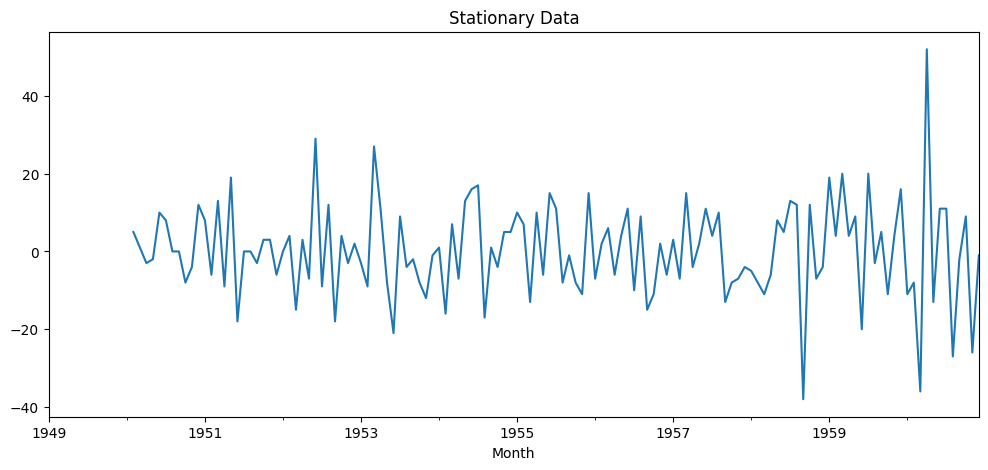

In [3]:
# First, a seasonal difference (12 months)
df['Seasonal Difference'] = df['Passengers'].diff(12)

# Then, a non-seasonal difference
df['Stationary'] = df['Seasonal Difference'].diff()

# Plot the stationary data
df['Stationary'].plot(figsize=(12, 5), title='Stationary Data')
plt.show()

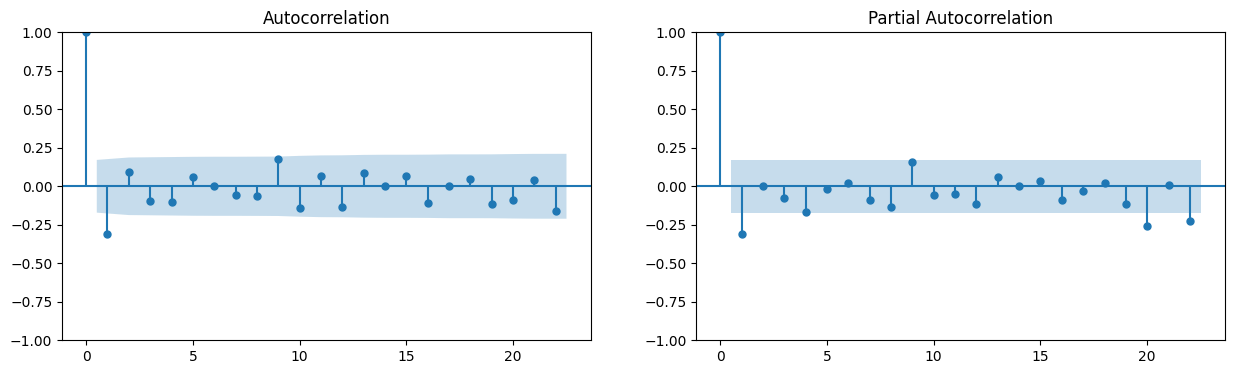

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Generate the plots for our stationary data
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
plot_acf(df['Stationary'].dropna(), ax=axes[0])
plot_pacf(df['Stationary'].dropna(), ax=axes[1])
plt.show()

In [5]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the model
model = SARIMAX(df['Passengers'],
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12))

# Fit the model
results = model.fit()

c:\Users\mailt\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mailt\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


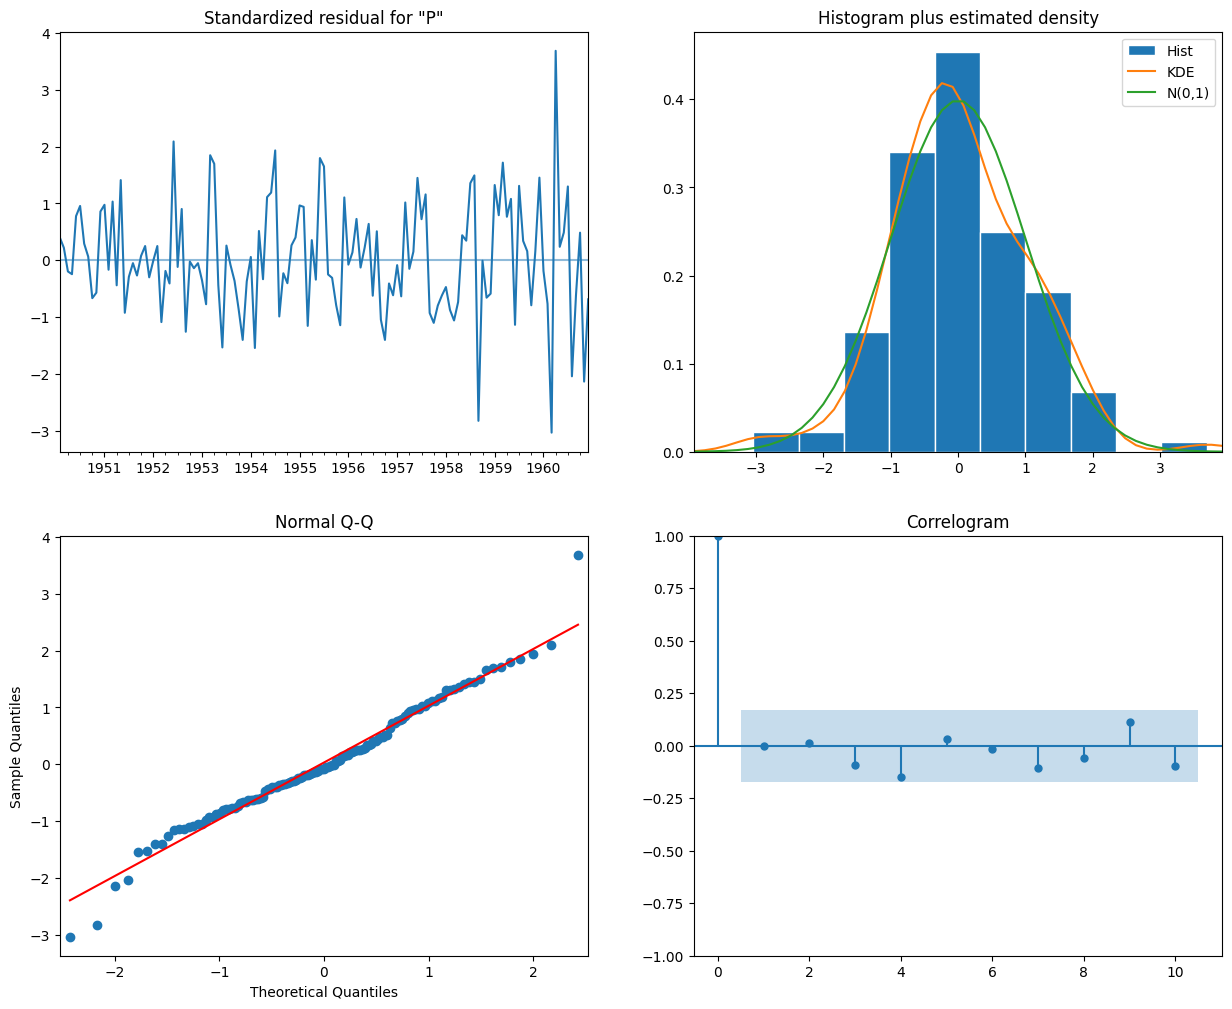

In [6]:
# Plot diagnostics
results.plot_diagnostics(figsize=(15, 12))
plt.show()

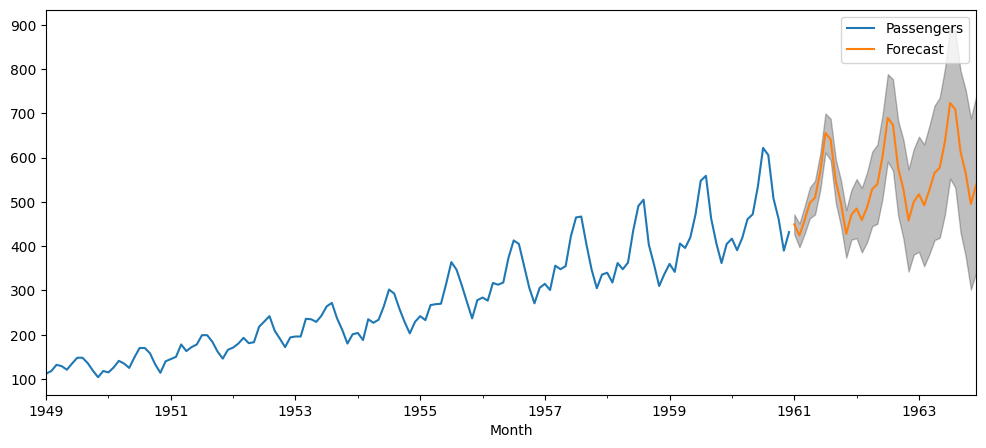

In [7]:
# Get forecast 36 steps ahead
forecast = results.get_forecast(steps=36)

# Get confidence intervals of the forecast
forecast_ci = forecast.conf_int()

# Plot the forecast
ax = df['Passengers'].plot(figsize=(12, 5))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='k', alpha=.25)
plt.legend()
plt.show()